# NLP

This notebook performs a comprehensive NLP analysis that includes three main parts:

*Named Entity Recognition (NER):* Extracting and visualizing entities from a selected online article to explore the distribution and frequency of key terms.

*Keyword Extraction & Text Summarization:* Analyzing a research paper using multiple techniques (SpaCy, RAKE, YAKE, and Word Cloud) to highlight the most frequent and significant keywords.

*Sentiment Analysis:* Reading manually curated tweets from a text file, performing sentiment analysis with TextBlob, and summarizing positive and negative sentiment results.

Each section provides visualizations and insights to assess the effectiveness and limitations of the applied NLP techniques.

In [1]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('stopwords')
from nltk import pos_tag, word_tokenize, RegexpParser

import spacy

from spacy import displacy

from collections import Counter
import en_core_web_sm
from bs4 import BeautifulSoup
import requests
import re
import numpy

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ali_h\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ali_h\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ali_h\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 1.Select any article on the website of your interest and perform Name Entity Relation (NER) analysis on it. Show all the necessary output and visualization and explain your findings. Also mention if you see any shortcoming or error in the algorithm output.





In [2]:
nlp = spacy.load('en_core_web_sm')

In [3]:
def url_to_string(url):
    res = requests.get(url)
    html = res.text
    soup = BeautifulSoup(html, 'html.parser')
    for script in soup(["script", "style", 'aside']):
        script.extract()
        return " ".join(re.split(r'[\n\t]+', soup.get_text()))

In [4]:
ny_bb = url_to_string('https://www.denofgeek.com/games/dungeons-and-dragons-half-race-changes-racism-controversy/')
article = nlp(ny_bb)
len(article.ents)

106

In [5]:
labels = [x.label_ for x in article.ents]
Counter(labels)

Counter({'ORG': 30,
         'PERSON': 23,
         'CARDINAL': 18,
         'DATE': 20,
         'GPE': 5,
         'ORDINAL': 1,
         'PRODUCT': 3,
         'LOC': 2,
         'WORK_OF_ART': 2,
         'PERCENT': 1,
         'FAC': 1})

There are 30 organizations (ORG), 3 Products, 23 person, 20 Dates....

In [6]:
items = [x.text for x in article.ents]
mostcommon = Counter(items).most_common(8)

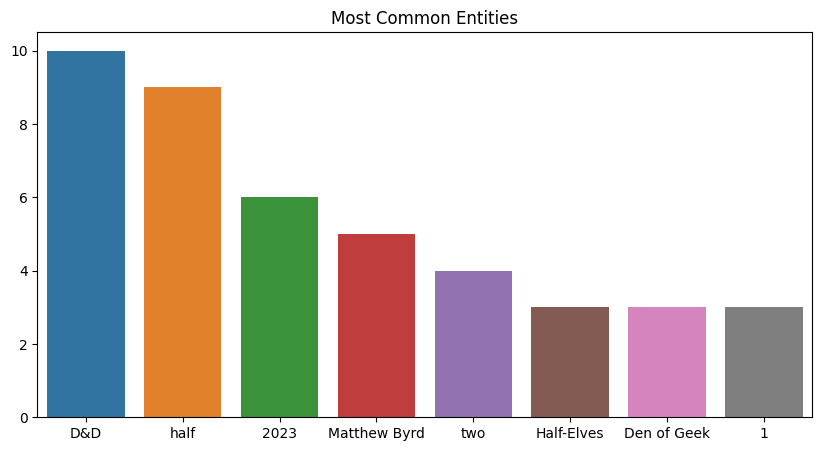

In [7]:
#bar graph to show the most common entities
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
valuex = [x[0] for x in mostcommon]
valuey = [x[1] for x in mostcommon]
plt.figure(figsize=(10,5))
sns.barplot(x=valuex, y=valuey)
plt.title('Most Common Entities')
plt.show()


The above shows the most common words used throught out the article. such as the word D&D is used 10 times while half is used 9 and Mattew byrd is used 4 times. The Highest word used is D&D while according to above the least is Twitter.

In [8]:
sentences = [x for x in article.sents]
print(sentences[0])

 Why Dungeons and Dragons Is Getting Rid of Controversial Half-Races | Den of Geek         Skip to main content area Menu Subscribe Den of Geek Facebook Twitter Instagram Youtube Twitch TikTok Search for: Search Close search Toggle search MoviesTVGamesComicsBooksCultureCollectiblesVideo Subscribe Facebook Twitter Instagram Youtube Twitch TikTok News Why Dungeons and Dragons Is Getting Rid of Controversial Half-Races A change to Dungeons and Dragons' half-race system has sparked another debate over the game's allegedly racist past.


In [9]:
displacy.render(nlp(str(sentences[0])), jupyter=True, style='ent')

In [10]:
dict([(str(x), x.label_) for x in nlp(str(sentences[0])).ents])

{'Den of Geek         Skip': 'ORG',
 'Menu Subscribe Den': 'PERSON',
 'Toggle': 'ORG',
 'MoviesTVGamesComicsBooksCultureCollectiblesVideo Subscribe Facebook': 'PERSON',
 'Instagram Youtube Twitch': 'PERSON',
 'TikTok News Why Dungeons': 'ORG',
 "Dungeons and Dragons'": 'ORG',
 'half': 'CARDINAL'}

### Lemmatization

In [11]:
[(x.orth_,x.pos_, x.lemma_) for x in [y for y in nlp(str(sentences[0])) if not y.is_stop and y.pos_ != 'PUNCT']]

[(' ', 'SPACE', ' '),
 ('Dungeons', 'NOUN', 'dungeon'),
 ('Dragons', 'PROPN', 'Dragons'),
 ('Getting', 'VERB', 'get'),
 ('Rid', 'NUM', 'rid'),
 ('Controversial', 'ADJ', 'controversial'),
 ('Half', 'PROPN', 'Half'),
 ('Races', 'NOUN', 'race'),
 ('|', 'NOUN', '|'),
 ('Den', 'PROPN', 'Den'),
 ('Geek', 'PROPN', 'Geek'),
 ('        ', 'SPACE', '        '),
 ('Skip', 'PROPN', 'Skip'),
 ('main', 'ADJ', 'main'),
 ('content', 'NOUN', 'content'),
 ('area', 'NOUN', 'area'),
 ('Menu', 'PROPN', 'Menu'),
 ('Subscribe', 'PROPN', 'Subscribe'),
 ('Den', 'PROPN', 'Den'),
 ('Geek', 'PROPN', 'Geek'),
 ('Facebook', 'PROPN', 'Facebook'),
 ('Twitter', 'PROPN', 'Twitter'),
 ('Instagram', 'PROPN', 'Instagram'),
 ('Youtube', 'PROPN', 'Youtube'),
 ('Twitch', 'PROPN', 'Twitch'),
 ('TikTok', 'PROPN', 'TikTok'),
 ('Search', 'PROPN', 'Search'),
 ('Search', 'VERB', 'search'),
 ('Close', 'ADJ', 'close'),
 ('search', 'NOUN', 'search'),
 ('Toggle', 'PROPN', 'Toggle'),
 ('search', 'NOUN', 'search'),
 ('MoviesTVGamesComic

The above have successfully identified the nouns,proper nouns and verbs of the chosen sentence.

In [12]:
displacy.render(nlp(str(sentences)), jupyter=True, style='ent')


### 2. Select any research paper of your interest and perform word frequency and keyword extraction analysis. Use at least 3 different techniques/libraries. Show all the necessary output and visualization and explain your findings. Compare different techniques and mention if you see any shortcoming or error in the algorithm output.

In [13]:
#!pip install -U tika
from tika import parser
raw = parser.from_file('Research_Paper_on_Basic_of_Artificial_Ne.pdf')

### Text Summarization

In [14]:
tokenize_words = nltk.tokenize.word_tokenize(raw['content'])
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(["T", "J", "D", "S", "M", "H", "et al", "et", "pp", "a.", "m.", "d.", "j.", "s.", "r.", "c.", "t."])
no_stopwords = [word for word in tokenize_words if word.lower() not in stopwords]

# remove punctuation, count raw words
nonPunct = re.compile('.*[A-Za-z].*')
clean_words = [w for w in no_stopwords if nonPunct.match(w)]
    
filtered_word_freq = nltk.FreqDist(clean_words)

In [15]:
filtered_word_freq.most_common(20)

[('network', 41),
 ('networks', 32),
 ('neural', 29),
 ('training', 26),
 ('data', 24),
 ('neurons', 23),
 ('ANN', 22),
 ('Neural', 20),
 ('system', 17),
 ('information', 16),
 ('learning', 16),
 ('http', 15),
 ('process', 12),
 ('layers', 12),
 ('layer', 12),
 ('learn', 11),
 ('Network', 10),
 ('problems', 10),
 ('recognition', 10),
 ('patterns', 10)]

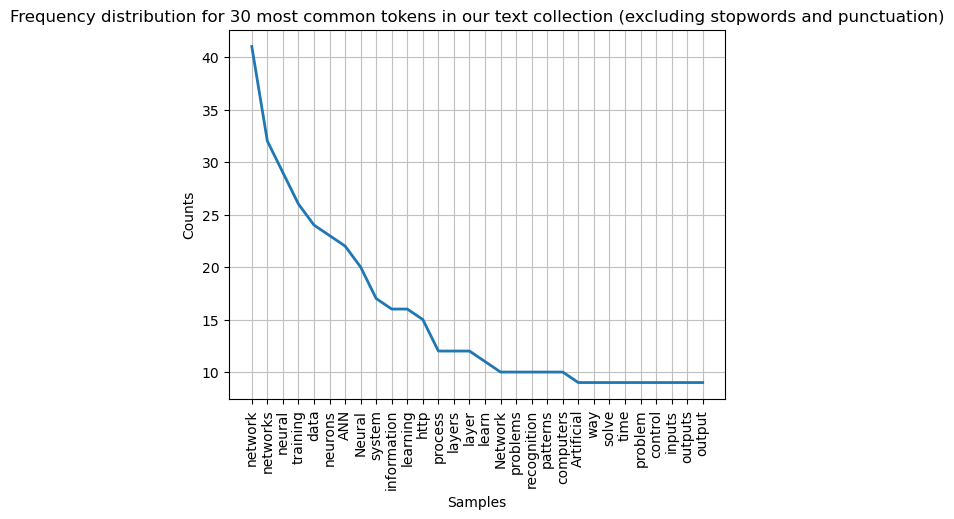

<AxesSubplot:title={'center':'Frequency distribution for 30 most common tokens in our text collection (excluding stopwords and punctuation)'}, xlabel='Samples', ylabel='Counts'>

In [16]:
filtered_word_freq.plot(30,title='Frequency distribution for 30 most common tokens in our text collection (excluding stopwords and punctuation)')

It has filtered us the 30 most common word that has been used throughout the research paper. The word 'network' lies on the top with a count of above 40.

In [21]:
#using spacy to find the most common entities
nlp = spacy.load('en_core_web_sm')
doc = nlp(raw['content'])
raw['content'] = raw['content'].replace('\n', ' ')

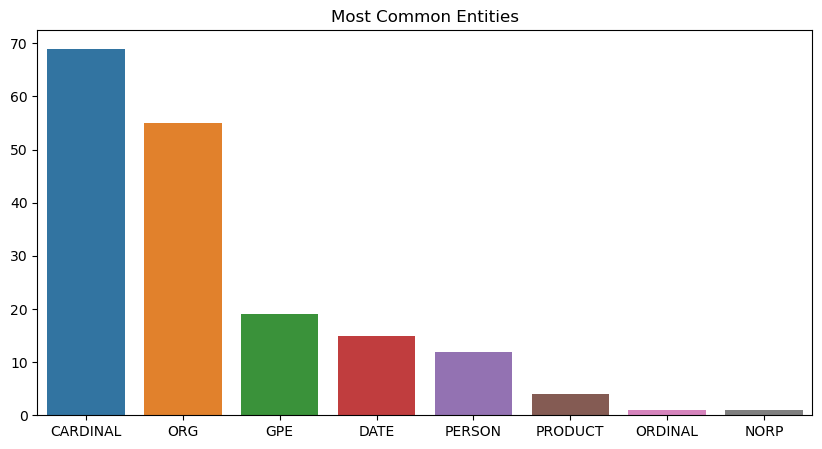

In [22]:

labels = [x.label_ for x in doc.ents]
commonvalues = Counter(labels).most_common(8)
commonvaluesx = [x[0] for x in commonvalues]
commonvaluesy = [x[1] for x in commonvalues]
plt.figure(figsize=(10,5))
sns.barplot(x=commonvaluesx, y=commonvaluesy)
plt.title('Most Common Entities')
plt.show()



Using SpaCy library we have found a different result. Here cardinal is the most common word used in the research paper while ordinal and norp are the least common words. 

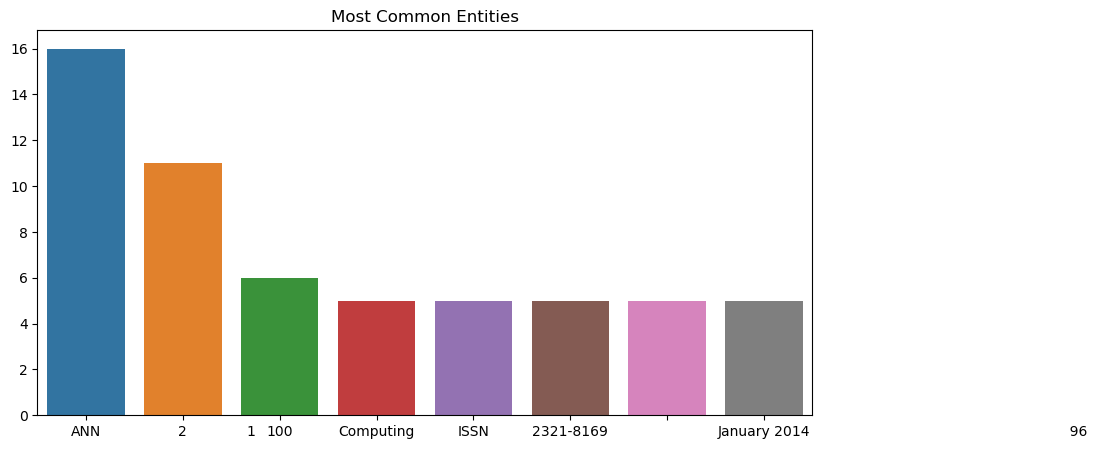

In [23]:
#using collections library to find the most common entities
from collections import Counter
items = [x.text for x in doc.ents]
mostcommon = Counter(items).most_common(8)
mostcommonx = [x[0] for x in mostcommon]
mostcommony = [x[1] for x in mostcommon]
plt.figure(figsize=(10,5))
sns.barplot(x=mostcommonx, y=mostcommony)
plt.title('Most Common Entities')
plt.show()


Using Collection Library we have found yet another different result. Here the most common is ANN which is an important part of Artificial intelligence research paper while the least common words are computing,ISSN, January 2014. 

In [24]:
#Final Word Cloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

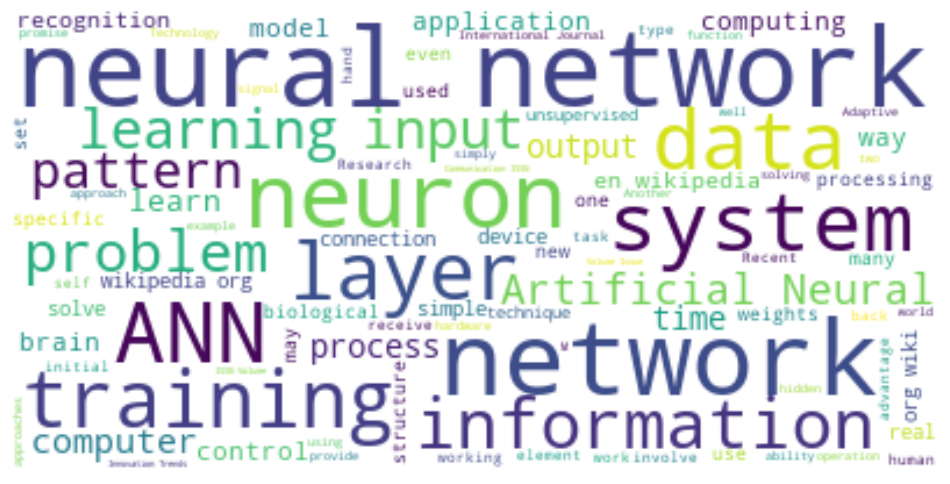

In [25]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(raw['content'])
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

We could see the most used words in the research paper in the form of sizes of the words, if the size is much bigger than the other than it is the most frequently used in the research paper. However, there are few stopwords that are irrelevant such as even or en.

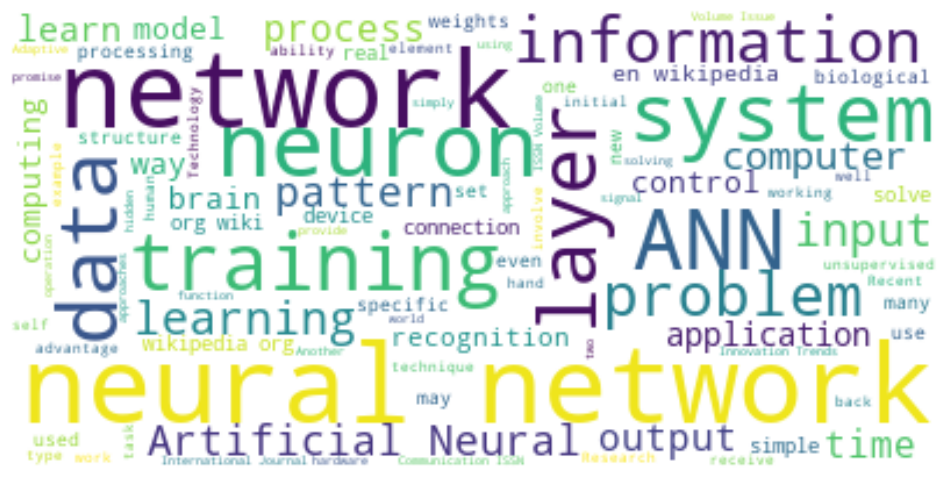

In [26]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["T", "J", "D", "S", "M", "H", "et al", "et", "al"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white").generate(raw['content'])

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Here the above also shows the most frequent words used in the research paper but without the stopwords in it to highlight the most important yet frequently used words to maintain the focus on the content of the research paper. Suchas Neural network, ANN and neuron.

In [27]:
#Keyword Extraction
from rake_nltk import Rake

r = Rake()
r.extract_keywords_from_text(raw['content'])
r.get_ranked_phrases_with_scores()[:10]

[(42.60606060606061,
  '1 96 – 100 _______________________________________________________________________________________ 99 ijritcc'),
 (42.60606060606061,
  '1 96 – 100 _______________________________________________________________________________________ 98 ijritcc'),
 (42.60606060606061,
  '1 96 – 100 _______________________________________________________________________________________ 97 ijritcc'),
 (42.60606060606061,
  '1 96 – 100 _______________________________________________________________________________________ 96 ijritcc'),
 (42.60606060606061,
  '1 96 – 100 _______________________________________________________________________________________ 100 ijritcc'),
 (38.02777777777778,
  'trouble recognizing even simple patterns much less generalizing'),
 (37.65592903828198, 'first step toward artificial neural networks came'),
 (34.72222222222222,
  'build informative models whenever conventional approaches fail'),
 (30.842105263157894, 'fault tolerance via redundant infor

We can see above the most used phrases that has been used in the research paper and it also shows the number of times they have been occur. These phrases are important for the user as it helps them to identify what research paper is mainly focused on.

In [28]:
nlp = spacy.load('en_core_web_sm')
doc2 = nlp(raw['content'])
print(doc2.ents)

(Computing, ISSN, 2321-8169, 2, 1                                                                                                                                                                                          96, 100, 96, January 2014, Available @ http://www.ijritcc.org                                                                   , Basic of Artificial Neural Network, Sonali, B. Maind  Department of Information Technology, Wardha, Priyanka Wankar, Department of Computer Science and Engineering, Wardha, ANN, ANN, Artificial Neural  Network, working & training, ANN, ANN, Keywords:-, Neurons, thousands of years old, first, 1943, Warren, Walter Pitts, 1, 2, Self-Organisation, ANN, 3, 4, Fault Tolerance, Neural, Computing, ISSN, 2321-8169, 2, 1                                                                                                                                                                                          96, 100, 97, January 2014, Available @ http://www.i

In [29]:
import yake


In [32]:
kw_extractor = yake.KeywordExtractor()
language = "en"
max_ngram_size = 2
deduplication_threshold = 0.9
numOfKeywords = 20
custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=numOfKeywords, features=None)
keywords = custom_kw_extractor.extract_keywords(raw['content'])
for kw in keywords:
    print(kw)


('neural networks', 0.0011542374818213712)
('Artificial Neural', 0.002681245981015878)
('Network', 0.0030907981653706933)
('Neural', 0.003206199252982336)
('networks', 0.004636197248056041)
('ANN', 0.007082831002359516)
('training', 0.01064883461888427)
('neurons', 0.013009141207757837)
('Artificial', 0.013672381606342997)
('data', 0.014196893394165674)
('Information', 0.0173208664596933)
('system', 0.019045123334955682)
('learning', 0.022928924388561568)
('Computing', 0.03035198968758024)
('Communication ISSN', 0.0304371365379012)
('Innovation Trends', 0.030564669333939656)
('layers', 0.03198546194495199)
('layer', 0.03198546194495199)
('computers', 0.03253374669024462)
('International Journal', 0.034773987287103014)


The output is betterthan Rake library output. Here we can see keyword phrases occurrence and 'International Journal', 0.034773987287103014 has been repeated many times as compared to other phrases.

### 3.  Choose any keyword of your interest and pull/scrap at least 10 (tweets) from Twitter. Manually put them in a text file. One tweet per line
a. Read the text file line by line.

b. Perform Sentiment Analysis on the tweet and show total positive and negative 
sentiment counts.

c. Display one Positive and one Negative sentiment and discuss if the algorithm 
is accurate.




In [13]:
import tweepy as tw
import json
import pandas as pd
import numpy as np
from textblob import TextBlob


In [33]:
# Read the text file line by line
with open('tweets.txt', 'r') as file:
    lines = file.readlines()

# Perform Sentiment Analysis on the tweets
sentiments = []
for line in lines:
    tweet = TextBlob(line)
    sentiment = tweet.sentiment
    sentiments.append((line.strip(), sentiment))

for sentiment in range(len(sentiments)):
    print(sentiment+1,"-->",sentiments[sentiment][1])


1 --> Sentiment(polarity=0.0, subjectivity=0.0)
2 --> Sentiment(polarity=0.16, subjectivity=0.5399999999999999)
3 --> Sentiment(polarity=-0.2, subjectivity=0.05)
4 --> Sentiment(polarity=0.25, subjectivity=0.25)
5 --> Sentiment(polarity=0.0, subjectivity=0.0)
6 --> Sentiment(polarity=0.1351020408163265, subjectivity=0.2822448979591836)
7 --> Sentiment(polarity=0.0, subjectivity=0.0)
8 --> Sentiment(polarity=0.0, subjectivity=0.0)
9 --> Sentiment(polarity=0.0, subjectivity=0.0)
10 --> Sentiment(polarity=-0.03214285714285717, subjectivity=0.6482142857142857)


In [34]:
# Show total positive and negative sentiment counts
positive_count = sum(1 for sentiment in sentiments if sentiment[1].polarity > 0)
negative_count = sum(1 for sentiment in sentiments if sentiment[1].polarity < 0)

print("Total positive sentiment count:", positive_count)
print("Total negative sentiment count:", negative_count)

# Display one positive and one negative sentiment
positive_sentiments = [sentiment for sentiment in sentiments if sentiment[1].polarity > 0]
negative_sentiments = [sentiment for sentiment in sentiments if sentiment[1].polarity < 0]

if positive_sentiments:
    print("Positive Sentiment:")
    print(positive_sentiments[0])
else:
    print("No positive sentiment found.")

if negative_sentiments:
    print("Negative Sentiment:")
    print(negative_sentiments[0])
else:
    print("No negative sentiment found.")

Total positive sentiment count: 3
Total negative sentiment count: 2
Positive Sentiment:
('Barberton High School in Barberton - A group of 11th grade students volunteered to be pepper sprayed for a class activity. It was a lesson in law enforcement and consequences.', Sentiment(polarity=0.16, subjectivity=0.5399999999999999))
Negative Sentiment:
('School reunion is a scam... Nobody is missing anyone,they just want to know whether you have made it in life or notðŸ˜‚ðŸ˜‚', Sentiment(polarity=-0.2, subjectivity=0.05))


Based on the sentiment analysis results:

1) Positive Sentiment:
('Barberton High School in Barberton - A group of 11th grade students volunteered to be pepper sprayed for a class activity. It was a lesson in law enforcement and consequences.', Sentiment(polarity=0.16, subjectivity=0.54))

The sentiment analysis result for this statement is positive with a polarity score of 0.16. The statement describes a class activity where students volunteered to be pepper sprayed as a lesson in law enforcement and consequences. The positive sentiment indicates that the activity was seen as valuable and educational by the students or the person who made the statement.

2) Negative Sentiment:
('School reunion is a scam... Nobody is missing anyone, they just want to know whether you have made it in life or notðŸ˜‚ðŸ˜‚', Sentiment(polarity=-0.2, subjectivity=0.05))

The sentiment analysis result for this statement is negative with a polarity score of -0.2. The statement expresses a negative opinion about school reunions, suggesting that they are a scam and that people only attend to find out if others have been successful in life. The negative sentiment reflects the person's dissatisfaction or skepticism towards school reunions.